# Data analysis
From MRP but modified.

In [9]:
# Initialization
# 1. Get the relevant dependencies 
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from event_model import event_model as em

# resource switch
dataset={
    'small':'datasets/small_dataset',
    'bsphiphi': 'datasets/bsphiphi',
    'minibias': 'datasets/minibias'
}


In [10]:
# analysis variables
DATASET = 'bsphiphi'
load_percent = 0.5
shuffle = True

In [11]:
# read in the events -> from the folder choosen 
loaded_events = []
for (dirpath, dirnames, filenames) in os.walk(os.path.abspath(os.path.join('..', dataset[DATASET]))):
    if shuffle:
        random.shuffle(filenames)

    for i, filename in enumerate(filenames):
        # Get an event
        f = open(os.path.realpath(os.path.join(dirpath, filename)))
        json_data = json.loads(f.read())
        loaded_events = loaded_events + [em.event(json_data)]
        f.close()
        
        if i == int(load_percent * len(filenames)):
            print(f'successfully loaded {i} events from {DATASET}')
            break


successfully loaded 500 events from bsphiphi


## Check about the distance between the modules etc.

In [4]:
# is the distance beween the parts of one module always the same?
# is this the thickness of the module (why are there some hits on one side and some on the othere?)

event = loaded_events[1] # take the first of the elements for this check

event.module_zs
for module in event.module_zs:
    print(module)
    print(list(module)[0]-list(module)[1])
    #print(module.hits)
    # pretty damn the same
    # distance 1.16
    # lets check how many hits might be affected
    print(module)
    break
print(len(event.module_zs)) # -> 52 modules with two parts always
    

{-288.08, -286.918}
-1.1619999999999777
{-288.08, -286.918}
52


In [5]:
# Creation of an csv files with the modules positions and distances
coordinates = []
distances = []
last = -288.080
for i,module in enumerate(event.module_zs):
    min_module = min(module)
    coordinates.append(min_module)
    distances.append(coordinates[-1]-(last))
    last = coordinates[-1]
df = pd.DataFrame([coordinates, distances])
#df.to_csv('module_positions_and_distaces.csv', index=False)

#If bug: #Debugging with 'del min'

## Visualisation of the left and the right hits

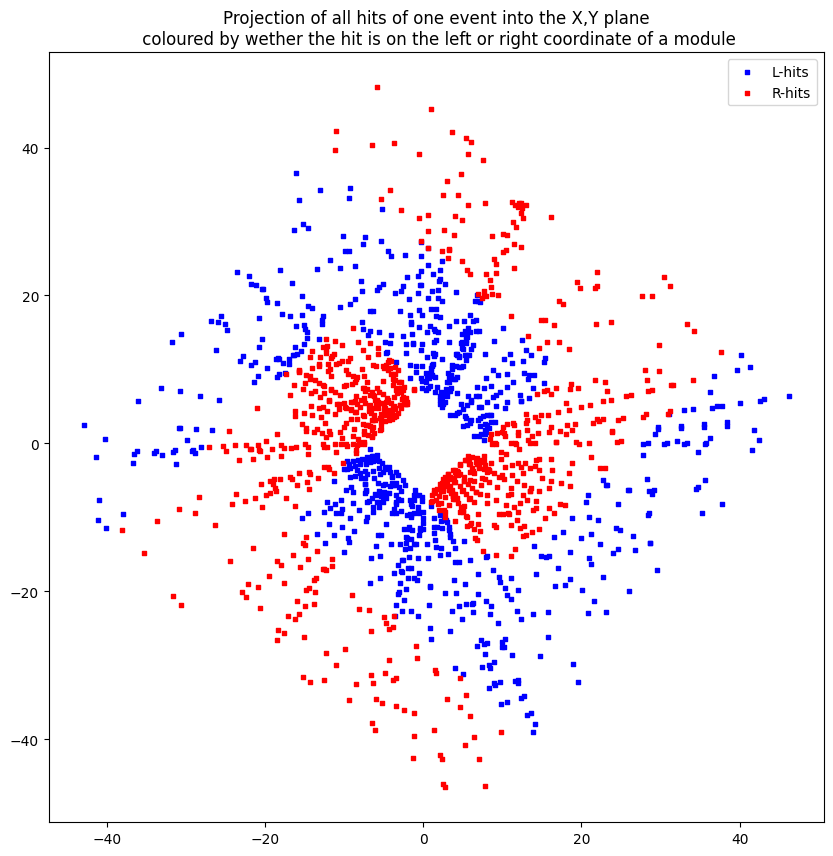

In [44]:
# Visualisation of the left and the right hits
# All hits that happend on the z-axis are "bring back together" in one dimension

left_hits = []   
right_hits = []

for module_number in range(52):
    l1 = min(event.modules[module_number].z)    
    # take the smallest z coordinate of each module (l1 is the small one but l2 could be the large one by for example doing max instead of min)
    # the hits put in the 'left_hits' are the ones happening in the smallest z
    # the hits put in the 'right_hits' are the ones happening in the largest z 
    # the smallest is on the left side and the largest is on the right side (for each module) > why ???
    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    is_left = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        is_left.append(hit.z==l1)

    left_hits.append(hit_coords[:,is_left])    
    right_hits.append(hit_coords[:,[not e for e in is_left]])    



left_hits = np.concatenate(left_hits, axis=1)
right_hits = np.concatenate(right_hits, axis=1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(left_hits[0,:], left_hits[1,:], s=5, c='b', marker="s", label='L-hits')
ax1.scatter(right_hits[0,:], right_hits[1,:], s=5, c='r', marker="s", label='R-hits')
ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()

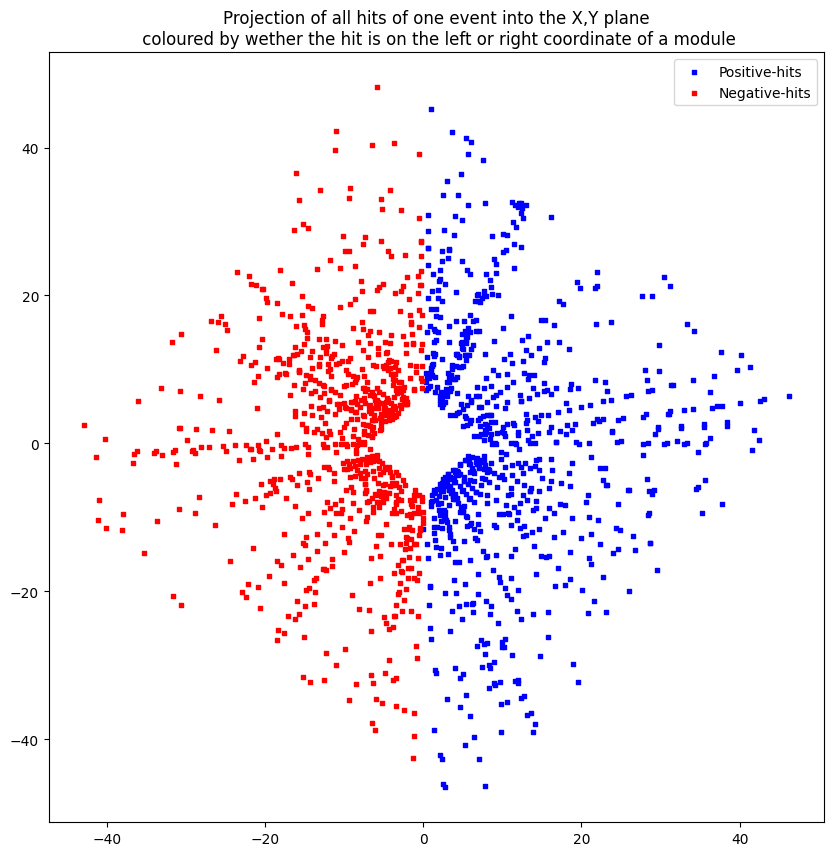

In [45]:
# Visualisation of the postitive and negative x left and the right hits

x_positive_hits = []   
x_negative_hits = []

for module_number in range(52):

    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    x_is_positive = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        x_is_positive.append(hit.x > 0)
    

    x_positive_hits.append(hit_coords[:,x_is_positive])    
    x_negative_hits.append(hit_coords[:,[not e for e in x_is_positive]])    


x_positive_hits = np.concatenate(x_positive_hits, axis=1)
x_negative_hits = np.concatenate(x_negative_hits, axis=1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(x_positive_hits[0,:], x_positive_hits[1,:], s=5, c='b', marker="s", label='Positive-hits')
ax1.scatter(x_negative_hits[0,:], x_negative_hits[1,:], s=5, c='r', marker="s", label='Negative-hits')
ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()

## Visualisation of the postitive and negative x coordinates depending on the modules numbering
### NB: All hits that happend on the z-axis are "bring back together" in one dimension

In [8]:
modules_list = range(0,51)
odd_modules = [num for num in modules_list if num % 2 == 1]
even_modules = [num for num in modules_list if num % 2 == 0]


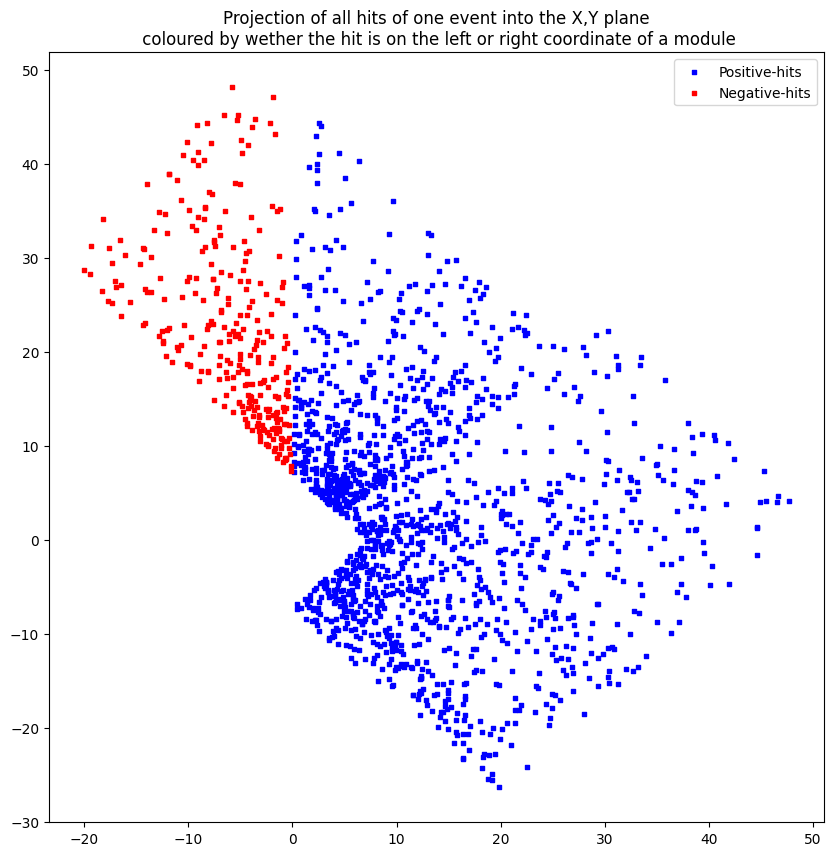

In [9]:

# Odd modules
x_positive_hits_odd = []   
x_negative_hits_odd = []

for module_number in odd_modules:

    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    x_is_positive = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        x_is_positive.append(hit.x > 0)
    

    x_positive_hits_odd.append(hit_coords[:,x_is_positive])    
    x_negative_hits_odd.append(hit_coords[:,[not e for e in x_is_positive]])    


x_positive_hits_odd = np.concatenate(x_positive_hits_odd, axis=1)
x_negative_hits_odd = np.concatenate(x_negative_hits_odd, axis=1)


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(x_positive_hits_odd[0,:], x_positive_hits_odd[1,:], s=5, c='b', marker="s", label='Positive-hits')
ax1.scatter(x_negative_hits_odd[0,:], x_negative_hits_odd[1,:], s=5, c='r', marker="s", label='Negative-hits')

ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()


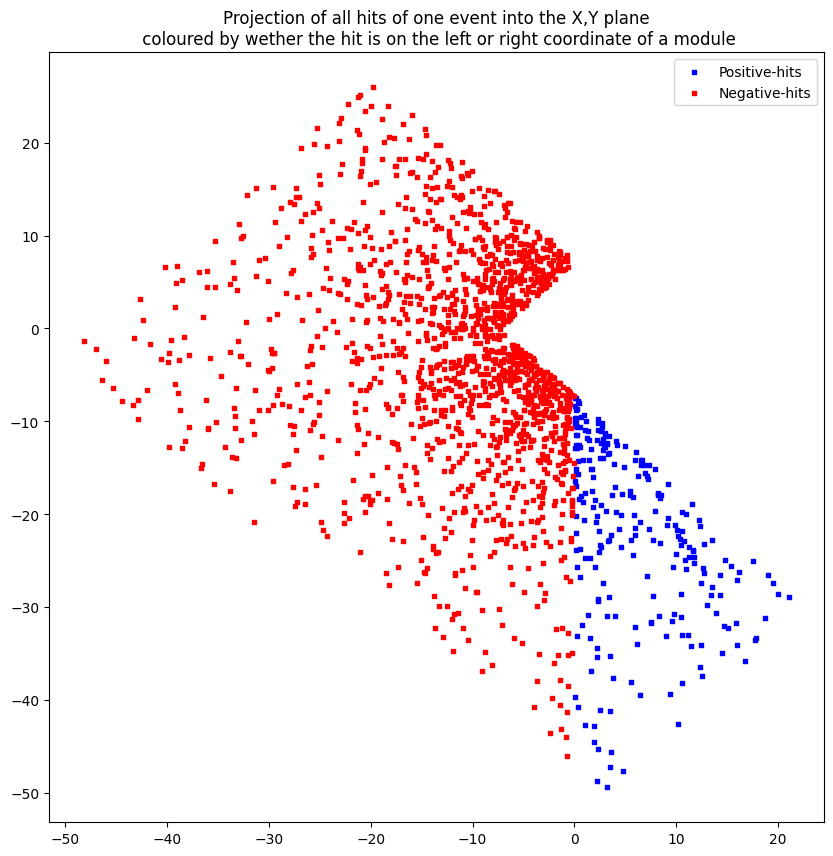

In [10]:
# Even module

x_positive_hits_even = []   
x_negative_hits_even = []

for module_number in even_modules:

    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    x_is_positive = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        x_is_positive.append(hit.x > 0)
    

    x_positive_hits_even.append(hit_coords[:,x_is_positive])    
    x_negative_hits_even.append(hit_coords[:,[not e for e in x_is_positive]])    

# Plot

x_positive_hits_even = np.concatenate(x_positive_hits_even, axis=1)
x_negative_hits_even = np.concatenate(x_negative_hits_even, axis=1)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(x_positive_hits_even[0,:], x_positive_hits_even[1,:], s=5, c='b', marker="s", label='Positive-hits')
ax1.scatter(x_negative_hits_even[0,:], x_negative_hits_even[1,:], s=5, c='r', marker="s", label='Negative-hits')
ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()

## Creation of a class 'particle'

In [47]:
# particle class to properly handle the real tracks -> might want to plot angles where we see the highest density
class particle(object):
    def __init__(self, particle, event):
        self.key = particle[0]
        self.pid = particle[1]
        self.p = particle[2]
        self.pt = particle[3]
        self.eta = particle[4]
        self.phi = particle[5]
        self.isLong = particle[6]
        self.isDown = particle[7]
        self.hasVelo = particle[8]
        self.hasUT = particle[9]
        self.hasScifi = particle[10]
        self.fromBeautyDecay = particle[11]
        self.fromCharmDecay = particle[12]
        self.fromStrangeDecay = particle[13]
        self.charge = particle[14]
        self.hits = particle[15]
        self.track = [hit for hit in event.hits if hit.id in self.hits]
        self.is_decay = any([particle[11], particle[12], particle[13]])
        self.is_noise = len(self.track) < 3
        # compare dist of 2 points to center
        #self.left_to_right = (math.sqrt(self.track[0].x**2 * self.track[0].y**2) < math.sqrt(self.track[1].x**2 * self.track[1].y**2))

def give_track_coords(self):
    coords = np.zeros(shape=(2,len(self.track)))
    for i, hit in enumerate(self.track):
        coords[0,i] = hit.x
        coords[1,i] = hit.y 
    return coords

In [18]:
def give_track_coords(particle):
    coords = np.zeros(shape=(3,len(particle.track)))
    for i, hit in enumerate(particle.track):
        coords[0,i] = hit.x
        coords[1,i] = hit.y 
        coords[2,i] = hit.z
    return coords

In [19]:
all_event_particles = []
hits_to_remove = []
all_track_hits = []

for i,event in enumerate(loaded_events[:10]):
    #print(i)
    for part in event.montecarlo.get('particles'):
        temp_particle = particle(part, event)
        all_event_particles = all_event_particles + [temp_particle]
        for hit in temp_particle.track:
            hits_to_remove.append(hit.id)
        all_track_hits = all_track_hits + temp_particle.track

noise_hits = [hit for hit in event.hits if hit.id not in hits_to_remove]
noise_coords = np.zeros(shape=(2,len(noise_hits)))

for i, hit in enumerate(noise_hits):
    noise_coords[0,i]= hit.x
    noise_coords[1,i]= hit.y

track_hit_coords = np.zeros(shape=(2, len(all_track_hits))) 
for i, hit in enumerate(all_track_hits):
    track_hit_coords[0,i] = hit.x
    track_hit_coords[1,i] = hit.y



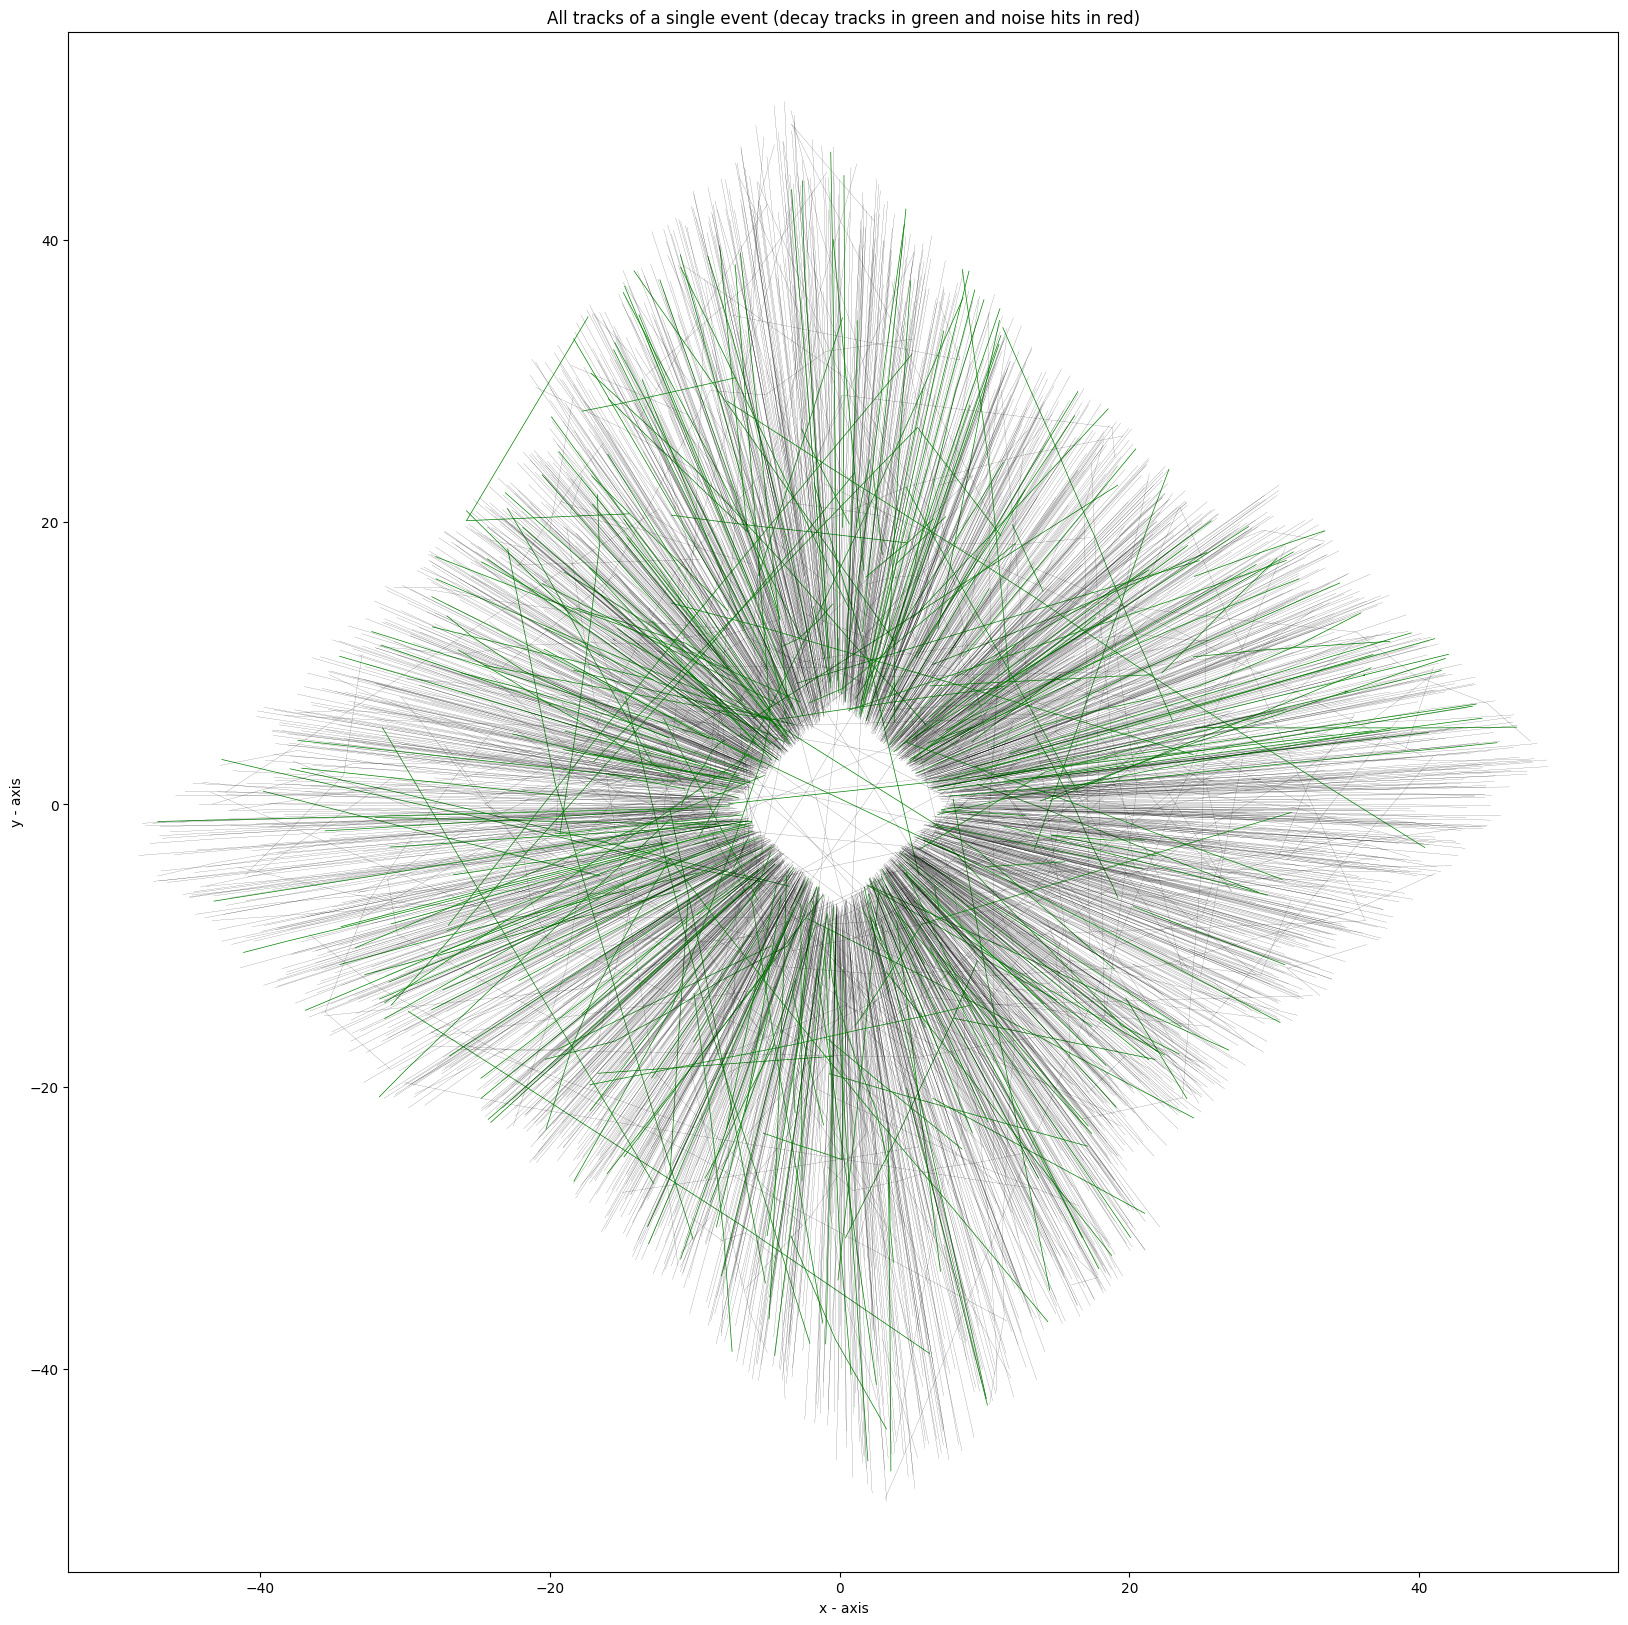

In [33]:
#Plot
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(111)

for particle in all_event_particles:
    coords = give_track_coords(particle)
    color = 'black'
    width = 0.1
    label = 'particle track'
    if particle.is_decay:
        width = 0.5
        color = 'green'
        label = 'decay track'
    ax.plot(coords[0], coords[1], linewidth=width, color=color, markeredgewidth=2, label = label)
ax.scatter(track_hit_coords[0],track_hit_coords[1], s=0.2, c ='b')
ax.scatter(noise_coords[0],noise_coords[1], s=0.2, c ='r')

ax.set_xlabel('x - axis')
# Set the y axis label of the current axis.
ax.set_ylabel('y - axis')
# Set a title of the current axes.
ax.set_title('All tracks of a single event (decay tracks in green and noise hits in red)')
# show a legend on the plot
#ax.legend()
# Display a figure.
plt.show()
#plt.savefig('test')

> There is a problem with this code, the noise hits don't compile and so don't appear.

In [25]:
# THIS IS NOT VERY USEFUL FOR ME 


# Lets analyse angles of the particles (distribution of this)
# all_particles = all_event_particles
# all_angles = []
# num_hits = []

# print(f'number of particles were looking at {len(all_particles)}')

#for particle in all_particles:
#    all_angles = all_angles + [particle.phi]
#    num_hits = num_hits + [len(particle.track)]


In [26]:
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


In [28]:
## need to check how phi is calculated
 
# i think its the angle between two vectors, one is the beam line (0,0,1) vector and the second can be constructed
# with 2 hits

# can not solve the angle problem at the moment because we can not calc 360° angles in 3d space. dont know what the phi is

# choose here any number to look at a particle
all_particles = all_event_particles

temp_track = all_particles[2100]

# remarkable -> no decay and starts in module 45

for i in range(len(temp_track.track)-2):
    hit_1 = temp_track.track[i]
    hit_2 = temp_track.track[i+1]
    # assuming the track goes in direction of the z 
    v_beam = (0,0,1)
    v_hits = (hit_2.x - hit_1.x,hit_2.y - hit_1.y,hit_2.z - hit_1.z )
    #print(temp_track.phi/(5*np.pi))
    print(angle(v_beam,v_hits))

0.13468448107869657
0.13346522492176474
0.13346522492176474
0.1339556529537714
0.1334413251707156
0.1344029057995239


In [117]:
len(all_particles)

8444

0.35966366650876364


(array([  9.,  11.,   3.,   4.,  73.,  81., 277., 297., 354., 388., 192.,
        209., 207., 253., 324., 308., 316., 349., 336., 304., 256., 278.,
        286., 255., 241., 216., 211., 181., 160., 136., 123., 109., 125.,
         77., 101.,  94.,  74.,  68., 113., 106., 140., 133., 137., 153.,
        115., 122.,  60.,  57.,   7.,   3.,   3.,   9.]),
 array([ 0.        ,  0.98076923,  1.96153846,  2.94230769,  3.92307692,
         4.90384615,  5.88461538,  6.86538462,  7.84615385,  8.82692308,
         9.80769231, 10.78846154, 11.76923077, 12.75      , 13.73076923,
        14.71153846, 15.69230769, 16.67307692, 17.65384615, 18.63461538,
        19.61538462, 20.59615385, 21.57692308, 22.55769231, 23.53846154,
        24.51923077, 25.5       , 26.48076923, 27.46153846, 28.44230769,
        29.42307692, 30.40384615, 31.38461538, 32.36538462, 33.34615385,
        34.32692308, 35.30769231, 36.28846154, 37.26923077, 38.25      ,
        39.23076923, 40.21153846, 41.19230769, 42.17307692, 43

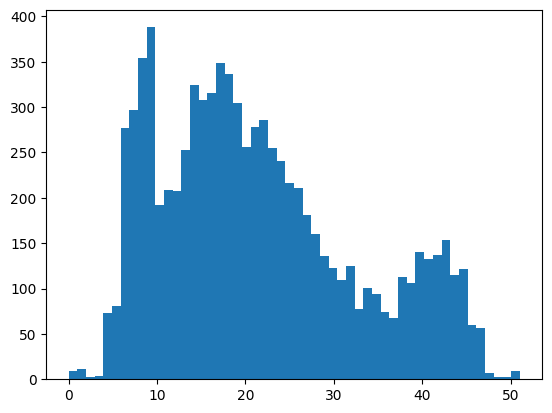

In [132]:
import matplotlib.pyplot as plt
################ getting the first and last hit of all the ###################
# i define origin hit as the one with closest distance to z axis
# i define the last hit as the one with furtherst distance from the z axis
# i guess i only need to look at the first and last hit of one particle -> have not seen smth else

all_particles = all_event_particles


min_hits = []
max_hits = []
count_reverse = 0
for particle in all_particles:
    hit1 = particle.track[0]    
    hit2 = particle.track[-1]
    
    if math.sqrt(hit1.x**2 + hit1.y**2) < math.sqrt(hit2.x**2 + hit2.y**2):

        min_hits = min_hits + [hit1]
        max_hits = max_hits + [hit2]
    else:
        # this happens
        min_hits = min_hits + [hit2]
        max_hits = max_hits + [hit1]
        count_reverse += 1
    
print(count_reverse/len(min_hits))

############## hist the distr of closest and furthest hits #############

plt.hist([hit.module_number for hit in min_hits], bins = 52)


In [49]:
all_event_particles = []
hits_to_remove = []
all_track_hits = []

for i,event in enumerate(loaded_events[:100]):
    #print(i)
    for part in event.montecarlo.get('particles'):
        temp_particle = particle(part, event)
        all_event_particles = all_event_particles + [temp_particle]
        for hit in temp_particle.track:
            hits_to_remove.append(hit.id)
        all_track_hits = all_track_hits + temp_particle.track

In [ ]:
def get_polar_coordinates(x, y):
 r = math.sqrt(x ** 2 + y ** 2)
 phi = math.atan2(x, y)
 if phi < 0:
 phi = math.pi - phi
 return r, phi


In [94]:
# have an idea about the max angles in the zx plane and zy plane 

#> we obtain a list with the 'max' angles xz and yz for each particle (as we take the first and last hit)
# on two separate plot (xz plane and yz plane), plots all of them
# find the max angle in each direction
# (nb: dont forget to run on each complete dataset)

from math import atan2

angle_xz_list = []
angle_yz_list = []
angle_xy_list = []
angle_yz_origin_list = []

for particle in all_particles:
    hit1 = particle.track[0]    
    hit2 = particle.track[-1]


    # ANGLES
    #angle_xz = math.atan((hit2.x - hit1.x) / (hit2.z - hit1.z))
    angle_xz = atan2((hit2.x - hit1.x),(hit2.z - hit1.z))
    #angle_yz = math.atan((hit2.y - hit1.y) / (hit2.z - hit1.z))
    angle_yz = atan2((hit2.y - hit1.y),(hit2.z - hit1.z))
    #angle_xy = math.atan((hit2.x - hit1.x) / (hit2.y - hit1.y))
    angle_xy = atan2((hit2.x - hit1.x),(hit2.y - hit1.y))
    angle_yz_origin = atan2((hit2.y - 0),(hit2.z - 0))
    
    #angle_xz = math.degrees(angle_xz)
    angle_yz = math.degrees(angle_yz)
    #angle_xy = math.degrees(angle_xy)
    angle_yz_origin = math.degrees(angle_yz_origin)

    angle_xz_list.append(angle_xz)
    angle_yz_list.append(angle_yz)
    angle_xy_list.append(angle_xy)
    angle_yz_origin_list.append(angle_yz_origin)

print(f'number of particles were looking at {len(all_particles)}')


number of particles were looking at 3870


In [66]:
print(min(angle_yz_list))
print(max(angle_yz_list))


-0.7530758751459763
0.6892917987830325


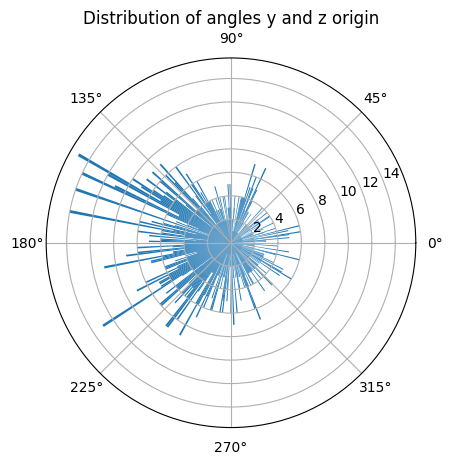

In [95]:
# plot
bins_number = 360  
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = [(np.pi + angle) for angle in angle_yz_origin_list]
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, alpha = 1)
plt.title('Distribution of angles y and z origin')
plt.show()

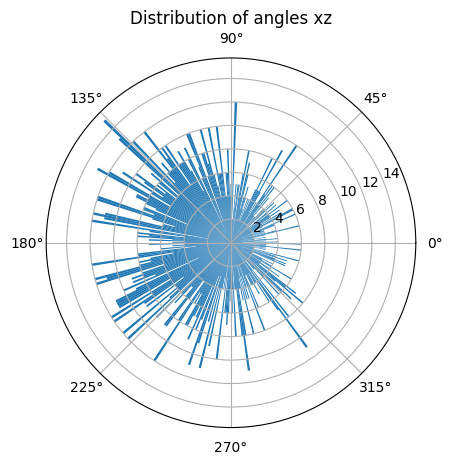

In [51]:
# plot
bins_number = 360  # the [0, 360) interval will be subdivided into this number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = [(np.pi + angle) for angle in angle_xz_list]
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, alpha = 1)
plt.title('Distribution of angles xz')
plt.show()

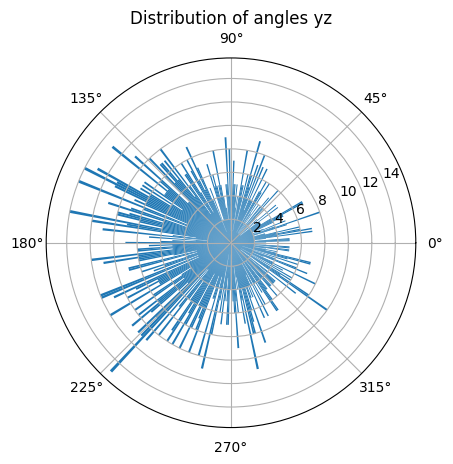

In [90]:
# plot
bins_number = 360  # the [0, 360) interval will be subdivided into this number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = [(np.pi + angle) for angle in angle_yz_list]
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, alpha = 1)
plt.title('Distribution of angles yz')
plt.show()

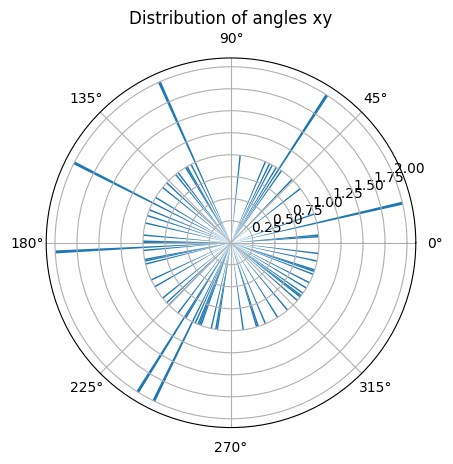

In [53]:
# plot
bins_number = 360  # the [0, 360) interval will be subdivided into this number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = [(np.pi + angle) for angle in angle_xy_list]
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, alpha = 1)
plt.title('Distribution of angles xy')
plt.show()

In [29]:
def plot_tracks(tracks, title=None):
    [
        plt.plot(
            [hit.z for hit in track.hits], 
            [hit.y for hit in track.hits], 
            color="b"
        )
        for track in tracks
    ]
    if title:
        plt.title(title)
    plt.xlabel('z axis')
    plt.ylabel('y axis')
    plt.show()


In [36]:
plt.hist([hit.module_number for hit in max_hits], bins = 52)

NameError: name 'max_hits' is not defined

In [120]:
################ checking how many tracks cross the beam line ##################
################ also checking how many tracks dont have consecutive triplets ##########
# the consecutive thing is really not nice
beam_crossing_particles = []
no_cosecutive_triplet = []

# id say we have a beam cross if either x or y change sign among hits
for particle in all_particles:
    x_p, x_n, y_p, y_n, = False, False, False, False
    triplet = 0
    last_module = -2
    for hit in particle.track:
        x_p = hit.x >0 or x_p
        x_n = hit.x <0 or x_n
        y_p = hit.y >0 or y_p
        y_n = hit.y <0 or y_n
        
        if triplet < 3:
            if hit.module_number in (last_module + 1,last_module + 1):
                triplet += 1
                last_module = hit.module_number
            else:
                triplet = 1
                last_module = hit.module_number
                
    if x_p + x_n + y_p + y_n > 2:
        beam_crossing_particles = beam_crossing_particles + [particle]
    if triplet < 3:
        no_cosecutive_triplet = no_cosecutive_triplet + [particle]
print(len(all_particles))
print('beam_crossing')
print(len(beam_crossing_particles))
print(len(beam_crossing_particles)/len(all_particles))
print('no_co')
print(len(no_cosecutive_triplet))
print(len(no_cosecutive_triplet)/len(all_particles))


# 5% of the tracks seem to cross the line

8444
beam_crossing
381
0.04512079583135954
no_co
8441
0.9996447181430601


In [121]:
no_cosecutive_triplet[10].track



[#715 module 14 {-5.463, 6.571, -11.918},
 #806 module 16 {-9.469, 11.354, 13.081},
 #917 module 18 {-13.319, 15.905, 36.919},
 #1003 module 20 {-17.325, 20.688, 61.919},
 #1088 module 22 {-21.331, 25.472, 86.919}]

In [122]:
decay = 0
for particle in all_particles:
    if particle.is_decay:
        decay +=1
print(decay)
# abput 5% of particles from decay

621


In [123]:
decay = 0
for particle in beam_crossing_particles:
    if particle.is_decay:
        decay +=1
print(decay)
# ~20%

#775 -> 132

82


In [124]:
beam_crossing_particles[20].track

[#1965 module 42 {-6.395, -2.799, 486.919},
 #2081 module 44 {-8.983, 0.99, 588.081},
 #2171 module 46 {-10.305, 2.857, 638.081},
 #2264 module 48 {-11.55, 4.801, 688.081},
 #2364 module 50 {-12.794, 6.746, 738.081}]

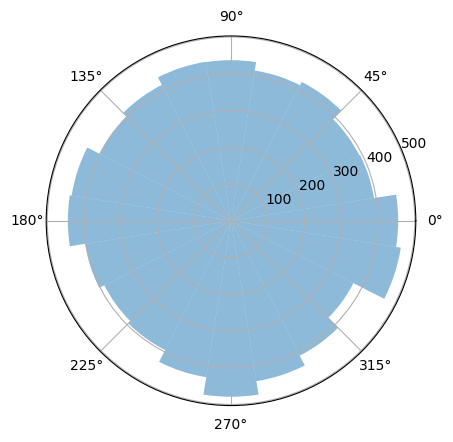

In [129]:
# discard ?!
############### I cant tell if this plots the angles correctly #########
# I think its correct because we get such a nice distribution

bins_number = 20  # the [0, 360) interval will be subdivided into this
# number of equal bins
bins = np.linspace(0.0, 2 * np.pi, bins_number + 1)
angles = [(np.pi + angle) for angle in all_angles]
n, _, _ = plt.hist(angles, bins)

plt.clf()
width = 2 * np.pi / bins_number
ax = plt.subplot(1, 1, 1, projection='polar')
bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0)
for bar in bars:
    bar.set_alpha(0.5)
plt.show()

In [127]:
from sklearn.linear_model import LinearRegression

def track_regression_analysis(particle):
    my_arr = np.zeros((len(particle.track),2))
    z = np.zeros((len(particle.track),1))
    for i, hit in enumerate(particle.track):
        my_arr[i,0] = hit.x        
        my_arr[i,1] = hit.y
        z[i] = hit.z
        
    x_reg = LinearRegression().fit(z,my_arr[:,0])
    y_reg = LinearRegression().fit(z,my_arr[:,1])
    
    dev_hit = particle.track[0]
    x_pred = x_reg.predict(np.array([dev_hit.z]).reshape(-1, 1))
    y_pred = y_reg.predict(np.array([dev_hit.z]).reshape(-1, 1))
    pred = (x_pred,y_pred)
    
    max_dev_hit = math.sqrt((x_pred[0]-dev_hit.x)**2 + (y_pred[0]-dev_hit.y)**2)
    max_angle = 0
    last_hit = dev_hit
    
    for hit in particle.track[1:]:
        x_pred = x_reg.predict(np.array([hit.z]).reshape(-1, 1))
        y_pred = y_reg.predict(np.array([hit.z]).reshape(-1, 1))
        new_deviation = math.sqrt((x_pred[0]-hit.x)**2 + (y_pred[0]-hit.y)**2)
        print()
        new_angle = angle((x_reg.coef_, y_reg.coef_,1), (hit.x-last_hit.x,hit.y-last_hit.y,hit.z-last_hit.z))
        if new_deviation >  max_dev_hit:
            max_dev_hit = new_deviation
            dev_hit = hit
            pred = (x_pred,y_pred)
            
        if new_angle > max_angle:
            max_angle = new_angle
            
        last_hit = hit
    return max_dev_hit, hit, pred, max_angle
    

print(track_regression_analysis(all_particles[0]))
    



(0.011259635568483856, #944 module 19 {-2.672, 30.05, 50.581}, (array([-2.4607345]), array([29.27065852])), 0.014219692987183482)


In [128]:
################ here I want to check what is the max and expected deviation of points from the line ############
max_angle = 0
max_deviation = 0

for particle in all_particles[:50]:
    dev_hit, hit, pred, angle = track_regression_analysis(particle)
    
    if max_angle < angle:
        max_angle = angle
    if max_deviation < dev_hit:
        max_deviation = dev_hit

print(max_angle)
print(max_deviation)

TypeError: 'float' object is not callable

In [ ]:
# what do i want to analyse 
# - angles between the segments
# - check for noise hits again in the small dataset
# - # of tracks with triplet in last detectors -> triplets in the last 3 detectors
# - distribution of distances from beamline in first hits